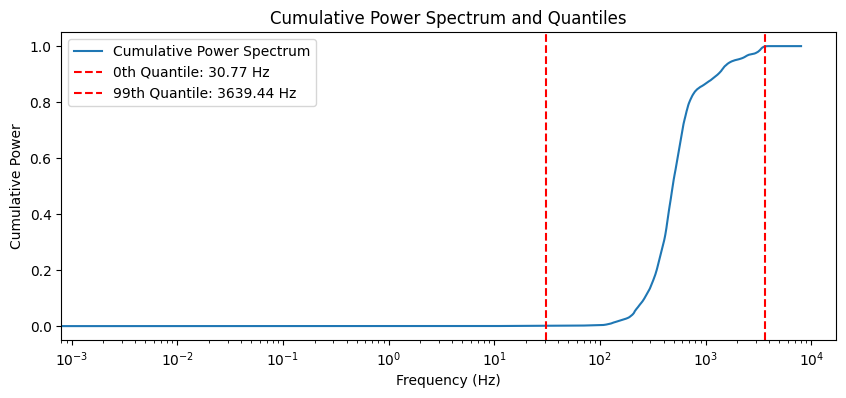

0th Quantile Frequency: 30.77 Hz
99th Quantile Frequency: 3639.44 Hz


In [8]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
# Load an MP3 file
audio_path = 'alan.grassia@credaris.ch--+41793651111_2023-12-22_16-42.mp3'
y, sr = librosa.load(audio_path, sr=None)  # y is the audio signal, sr is the sampling rate

# Compute the power spectrum (magnitude squared of the FFT)
power_spectrum = np.abs(np.fft.fft(y))**2
freqs = np.fft.fftfreq(len(power_spectrum), 1/sr)

# Only consider the positive half of the spectrum
half_len = len(power_spectrum)//2
power_spectrum = power_spectrum[:half_len]
freqs = freqs[:half_len]

# Normalize the power spectrum to compute the cumulative distribution
normalized_power_spectrum = power_spectrum / np.sum(power_spectrum)
cumulative_power_spectrum = np.cumsum(normalized_power_spectrum)

# Determine the 25th, 50th, and 75th quantile frequencies
quantiles = [0.001, 0.999]
quantile_freqs = [freqs[np.argmin(np.abs(cumulative_power_spectrum - q))] for q in quantiles]

# Plot the cumulative distribution with quantile frequencies
plt.figure(figsize=(10, 4))
plt.plot(freqs, cumulative_power_spectrum, label='Cumulative Power Spectrum')
for qf, q in zip(quantile_freqs, quantiles):
    plt.axvline(x=qf, color='r', linestyle='--', label=f'{int(q*100)}th Quantile: {qf:.2f} Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Cumulative Power')
plt.title('Cumulative Power Spectrum and Quantiles')
plt.legend()
plt.xscale('log')  # Log scale for easier visualization
plt.show()

# Print quantile frequencies
for qf, q in zip(quantile_freqs, quantiles):
    print(f'{int(q*100)}th Quantile Frequency: {qf:.2f} Hz')